# 50,000 IMDV TV & WEB SERIES :

![](https://myhackingworld.com/wp-content/uploads/2019/12/imdb-tv-free-movie-download_compressed.jpg)

* It is a collection of 50,000 IMDV's TV shows and WEB Series.
* The dataset is prepared by scraping the IMDb's website but is not endorsed by IMDb. 
* One of the most popular use of this dataset can be to create recommendation systems. 
* The series can be categorized based on cast of your choice, rating and the type of genre you are into among others.
So, Let's explore the dataset.

# Problems to Solve Using This Dataset:

1. Explore the data and delete the rows with null values.
2. List the total unique Genre and calculate the number of series in each Genre.
3. List the total unique Casts and calculate the number of series done by each Cast.
4. Sort the dataset with respect to years and calculate the number of series in each year.
5. Calculate the Average Runtime.
6. Build a function to filter the Dataset with respect to 
    I. Genre
    II. Cast
    III. Series Title
7. Count the total number of series w.r.t. Rating 
8. Fill the Numeric null values with mean value if required.
9. Calculate the percentage of the dataset with each exploration.
10. Use Barplot, Boxplot, Heatmap,etc. at appropriate places.

## Step 1: Installing and Importing The Libraries:

In [1]:
# Installing the required libraries:
!pip install opendatasets;

In [2]:
# Importing The Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os

## Step 2: Downloading The Dataset:

In [3]:
# Downloding the dataset:
data=od.download('https://www.kaggle.com/datasets/muralidharbhusal/50000-imdb-tv-and-web-series')

Skipping, found downloaded files in "./50000-imdb-tv-and-web-series" (use force=True to force download)


## Step 3: Loading The Dataset:

In [4]:
# Loading the dataset:
df=pd.read_csv('50000-imdb-tv-and-web-series/TV Series.csv')

## Step 4: Viewing The Dataset:

In [5]:
# Viewing the data:
df.head(5)

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
3,1923,(2022–2023),60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...
4,Jack Ryan,(2018– ),60 min,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,...","Up-and-coming CIA analyst, Jack Ryan, is thrus..."


In [6]:
df.tail(3)

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
49997,The Lord of the Rings: The Rings of Power,(2022– ),****,"Action, Adventure, Drama",6.9,"Morfydd Clark, Ismael Cruz Cordova, Charlie Vi...",Epic drama set thousands of years before the e...
49998,The Bear,(2022– ),30 min,"Comedy, Drama",8.4,"Jeremy Allen White, Ebon Moss-Bachrach, Ayo Ed...",A young chef from the fine dining world return...
49999,Supernatural,(2005–2020),44 min,"Drama, Fantasy, Horror",8.4,"Jared Padalecki, Jensen Ackles, Jim Beaver, Mi...",Two brothers follow their father's footsteps a...


## Step 3: Basic Information of The Dataset:

In [7]:
# Shape of the dataset:
df.shape

(50000, 7)

In [8]:
# All the columns name:
df.columns

Index(['Series Title', 'Release Year', 'Runtime', 'Genre', 'Rating', 'Cast',
       'Synopsis'],
      dtype='object')

In [9]:
# Information of each columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Title  50000 non-null  object
 1   Release Year  49800 non-null  object
 2   Runtime       50000 non-null  object
 3   Genre         50000 non-null  object
 4   Rating        50000 non-null  object
 5   Cast          49909 non-null  object
 6   Synopsis      50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


## Step 6: Checking For Missing Values:

In [10]:
# Checking the missing values:
df.isnull().sum()

Series Title      0
Release Year    200
Runtime           0
Genre             0
Rating            0
Cast             91
Synopsis          0
dtype: int64

In [11]:
# Total null values:
df.isnull().sum().sum()

291

### Note:
* Total Number of missing values in the dataset = 291

In [12]:
# seprating the data which contains null values
null_rows=df[df.isnull().any(axis=1)]
null_rows

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
550,The Idol,NaN,****,Drama,****,"Lily-Rose Depp, The Weeknd, Suzanna Son, Troye...",A self-help guru and leader of a modern-day cu...
636,"Yellowstone Spinoff, 6666",NaN,****,"Drama, Western",****,NaN,"Founded when Comanches still ruled West Texas,..."
756,A Court of Thorns and Roses,NaN,****,Fantasy,****,NaN,A huntress agrees to travel to a magical realm...
794,Avatar: The Last Airbender,NaN,****,"Action, Adventure, Comedy",****,"Tamlyn Tomita, Daniel Dae Kim, Ken Leung, Paul...",Live-action adaptation of the animated series ...
937,History of the World: Part II,NaN,****,"Comedy, History",****,"Gary Nguyen, David Stassen, Dove Cameron, Pame...","Sequel to the 1981 film, History of the World:..."
...,...,...,...,...,...,...,...
9950,Hellraiser,NaN,****,Horror,****,NaN,"TV series based on Clive Barker's horror film,..."
9953,Escobar by Escobar,(2022– ),****,"Documentary, Biography, Crime",6.6,NaN,A documentary about the most notorious drug ba...
9954,The Gone,NaN,****,"Drama, Mystery",****,"Richard Flood, Acushla-Tara Kupe, Carolyn Brac...",An Irish detective teams up with a Kiwi cop to...
9962,The Most Dangerous Man in America,NaN,****,Crime,****,Star:Woody Harrelson,The Most Dangerous Man In America follows Lear...


In [13]:
# Calculating the percentage of missing value:
missing_value_per=df.isnull().sum()/df.shape[0]*100
missing_value_per

Series Title    0.000
Release Year    0.400
Runtime         0.000
Genre           0.000
Rating          0.000
Cast            0.182
Synopsis        0.000
dtype: float64

<AxesSubplot:>

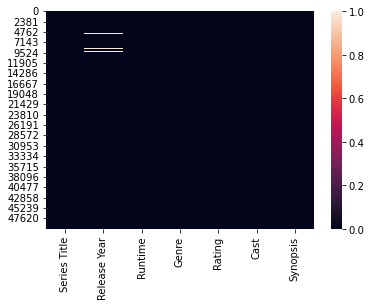

In [14]:
# Visulalizing Null values:
sns.heatmap(df.isnull())

### Note:
* The white parts shows the null values in the dataset.

## Step 7: Removing The Missing Values:

In [15]:
# Droping the missing rows:
df2 = df.dropna(how='any',axis=0) 

In [16]:
# Verifing for missing values:
df2.isnull().sum()

Series Title    0
Release Year    0
Runtime         0
Genre           0
Rating          0
Cast            0
Synopsis        0
dtype: int64

<AxesSubplot:>

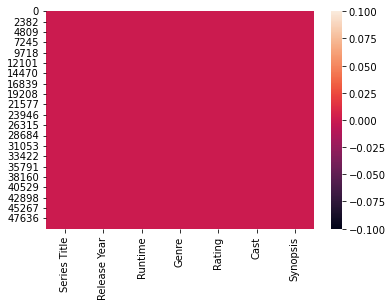

In [17]:
# Now visulalizing the dataset:
sns.heatmap(df2.isnull())

## Step 8: Exploring The Clean Dataset:

In [18]:
# Seeing the basic properties:
df2.describe()

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
count,49744,49744,49744,49744,49744,49744,49744
unique,9406,1063,236,653,86,9733,9665
top,The Office,(2022– ),60 min,"Action, Adventure, Drama",8.1,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
freq,804,12925,10458,5721,4345,801,801


In [19]:
# Viewing top 5 rows
df2.head(5)

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
3,1923,(2022–2023),60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...
4,Jack Ryan,(2018– ),60 min,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,...","Up-and-coming CIA analyst, Jack Ryan, is thrus..."


In [20]:
# Viewing The `Genre` column:
df2_genre=df2['Genre'].unique()
df2_genre

array(['Comedy, Crime, Fantasy', 'Drama, Western', 'Comedy, Drama',
       'Action, Drama, Thriller', 'Crime, Drama',
       'Action, Drama, Mystery', 'Action, Adventure, Crime',
       'Action, Adventure, Drama', 'Drama, Horror, Thriller',
       'Comedy, Drama, Romance', 'Drama, Thriller',
       'Adventure, Drama, Family', 'Fantasy, Horror', 'Drama, Mystery',
       'Crime, Drama, Thriller', 'Drama, Fantasy, Horror',
       'Biography, Drama, History', 'Crime, Drama, Mystery',
       'Drama, Mystery, Sci-Fi', 'Crime', 'Drama, Mystery, Thriller',
       'Action, Comedy, Crime', 'Action, Adventure, Mystery', 'Drama',
       'Comedy', 'Drama, Romance', 'Documentary, Drama, History',
       'Comedy, Drama, Sport', 'Adventure, Drama, Sci-Fi',
       'Comedy, Romance', 'Animation, Action, Adventure',
       'Action, Crime, Drama', 'Animation, Adventure, Comedy',
       'Action, Adventure, Comedy', 'Drama, Horror, Sci-Fi',
       'Comedy, Crime, Drama', 'Drama, Sci-Fi, Thriller',
       'C

In [21]:
# Seprating the Genres into single Genre:
unique_values_genre = {val for sub_list in df2_genre for val in sub_list.split(', ')}
unique_values_genre

{'****',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [22]:
# Seening the `Release Year` column:
df2_yr=df2['Release Year'].unique()
df2_yr

array(['(2022– )', '(2018– )', '(2021–2023)', ..., '(1980–2003)',
       '(1994–2005)', '(1988)'], dtype=object)

In [23]:
# Seenig the `Cast` column:
df2_cast=df2['Cast'].unique()
df2_cast

array(['Jenna Ortega, Hunter Doohan, Percy Hynes White, Emma Myers',
       'Kevin Costner, Luke Grimes, Kelly Reilly, Wes Bentley',
       'Jennifer Coolidge, Jon Gries, F. Murray Abraham, Adam DiMarco',
       ..., 'Tom Ward, Dominic Selwood, Rob Bell, James S. Corum',
       'Paula Castaño, Kimberly Reyes, Alejandra Miranda, Adriana Ricardo',
       'Gregg Wallace, Michel Roux Jr., Sean Pertwee, Monica Galetti'],
      dtype=object)

In [24]:
# Seprating The `Costs` into singel Cast:
unique_values_cast = {val for sub_list in df2_cast for val in sub_list.split(', ')}
unique_values_cast

{'Hasan Minhaj',
 'Brendan Fraser',
 'Rosario Corso',
 'Miyoshi Umeki',
 'Eom Hyo-Seob',
 'Tiffany Haddish',
 'Fred Astaire',
 'Go Soo',
 'Iris Adrian',
 'David Bradley',
 'Pelin Akil',
 'Marina Gregory',
 'Christophe Kourotchkine',
 'Raphael Rowe',
 'Marie Göranzon',
 'Boyd Flinders',
 'Heidi Arena',
 "Katarina 'Kato' Wittich",
 'McKell David',
 'Cynthia Klitbo',
 'Véronique Beaudet',
 'Caitlyn Bairstow',
 'Livia Brito',
 'Nathan Saidden',
 'Alex Newell',
 'Cree',
 'Yootha Joyce',
 'Ron Nyman',
 'Leyla Tanlar',
 'Morven Christie',
 'Hana Selimovic',
 'Carmen Lebbos',
 'Bhavna Limbachia',
 'Geert Van Rampelberg',
 'Patricia Routledge',
 'Angunnguaq Larsen',
 'Meike Droste',
 'Ralph Garman',
 'Andrew Stevens',
 'Mabuki Andô',
 'Stuart Townsend',
 'Liam Hemsworth',
 'Amir Hossein Amirpour',
 'Nicky Butt',
 'Michael Jeter',
 'Jack Shepherd',
 'Kevin Eubanks',
 'Angela Ko',
 'Adriyan Rae',
 'Nicholas Ralph',
 'Cyrus Arnold',
 'Jamison Stern',
 'Sue Aikens',
 'Tyler Grey',
 'Michelle Visage

###  Building a function to filter the dataset w.r.t. Genre:


In [25]:
#for genre in unique_values_genre:
def filter_by_genre(df2, genre):
    """
    Filters a DataFrame by genre
    
    Parameters:
        - df (DataFrame): The DataFrame to filter
        - genre (str): The genre to filter by
        
    Returns:
        - DataFrame: The filtered DataFrame
    """
    filtered_data = df2['Series Title'].loc[df['Genre'].str.contains(genre)]
    return filtered_data

In [26]:
# Checking the function:
filter_by_genre(df2, 'Action')

4                                        Jack Ryan
6                              Alice in Borderland
7                                      The Recruit
8                                           Willow
9                                   The Last of Us
                           ...                    
49973                          House of the Dragon
49980                                  The Witcher
49981                                     The Boys
49982           National Treasure: Edge of History
49997    The Lord of the Rings: The Rings of Power
Name: Series Title, Length: 11299, dtype: object

# 9 Analyzing The Dataset:

## 9.1 Analyzing w.r.t. Genre:

In [27]:
# split the 'Genre' column into separate columns
genre_df2 = df2['Genre'].str.get_dummies(sep=', ')
genre_df2

,****,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
49997,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Calculating total number of sereies in each Genre:
genre_df2.sum().sort_values(ascending=False)

Drama          38803
Crime          13665
Action         11299
Adventure      10262
Comedy          9957
Mystery         8887
Thriller        5362
Fantasy         4616
Horror          4289
Sci-Fi          2748
Romance         2544
History         1851
Western         1689
Family          1613
Animation       1491
Documentary     1272
Biography        933
Sport            931
Reality-TV       702
Game-Show        262
Short            212
Music            172
Talk-Show        121
War               60
News              49
Musical           45
****              17
dtype: int64

In [29]:
# CaLculating the percentage of each Genre:
genre_df2_percentages = genre_df2.mean().sort_values(ascending=False) * 100
genre_df2_percentages

Drama          78.005388
Crime          27.470650
Action         22.714297
Adventure      20.629624
Comedy         20.016484
Mystery        17.865471
Thriller       10.779189
Fantasy         9.279511
Horror          8.622145
Sci-Fi          5.524284
Romance         5.114185
History         3.721052
Western         3.395384
Family          3.242602
Animation       2.997346
Documentary     2.557092
Biography       1.875603
Sport           1.871583
Reality-TV      1.411225
Game-Show       0.526697
Short           0.426182
Music           0.345770
Talk-Show       0.243245
War             0.120618
News            0.098504
Musical         0.090463
****            0.034175
dtype: float64

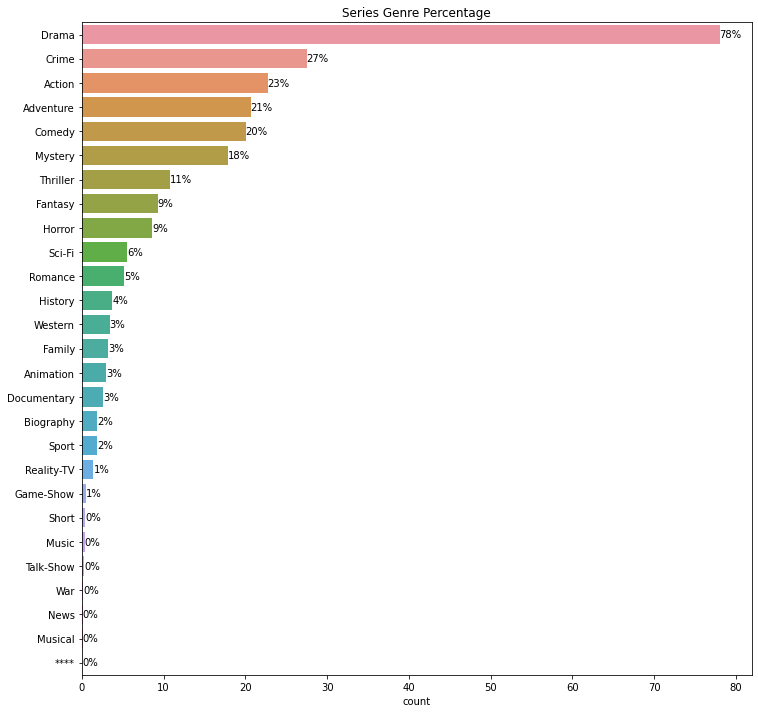

In [30]:
# Ploting these data using `barplot` to understand it better:
plt.figure(figsize=(12, 12))
graph=sns.barplot(x=genre_df2_percentages, y=genre_df2_percentages.index)

# set the x-axis tick labels to the desired percentages
for i in graph.containers:
    graph.bar_label(i, labels=['{:.0f}%'.format(x) for x in genre_df2_percentages.values])

plt.title("Series Genre Percentage");
plt.xlabel('count');
plt.show()

## 9.2 Analyzing w.r.t. Rating:


In [31]:
# Viewing the dataset:
df2.head(2)

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...


In [32]:
# Counting the series with respect to ratings:
top_rating=df2['Rating'].value_counts()
top_rating

8.1    4345
8.7    4122
7.4    2806
7.9    2745
7.7    2632
       ... 
1.4       1
1.1       1
2.1       1
2.0       1
1.8       1
Name: Rating, Length: 86, dtype: int64

In [33]:
# Calculating the percentage of Ratings:
top_rating_per=top_rating/df2.shape[0]*100
top_rating_per

8.1    8.734722
8.7    8.286427
7.4    5.640881
7.9    5.518253
7.7    5.291090
         ...   
1.4    0.002010
1.1    0.002010
2.1    0.002010
2.0    0.002010
1.8    0.002010
Name: Rating, Length: 86, dtype: float64

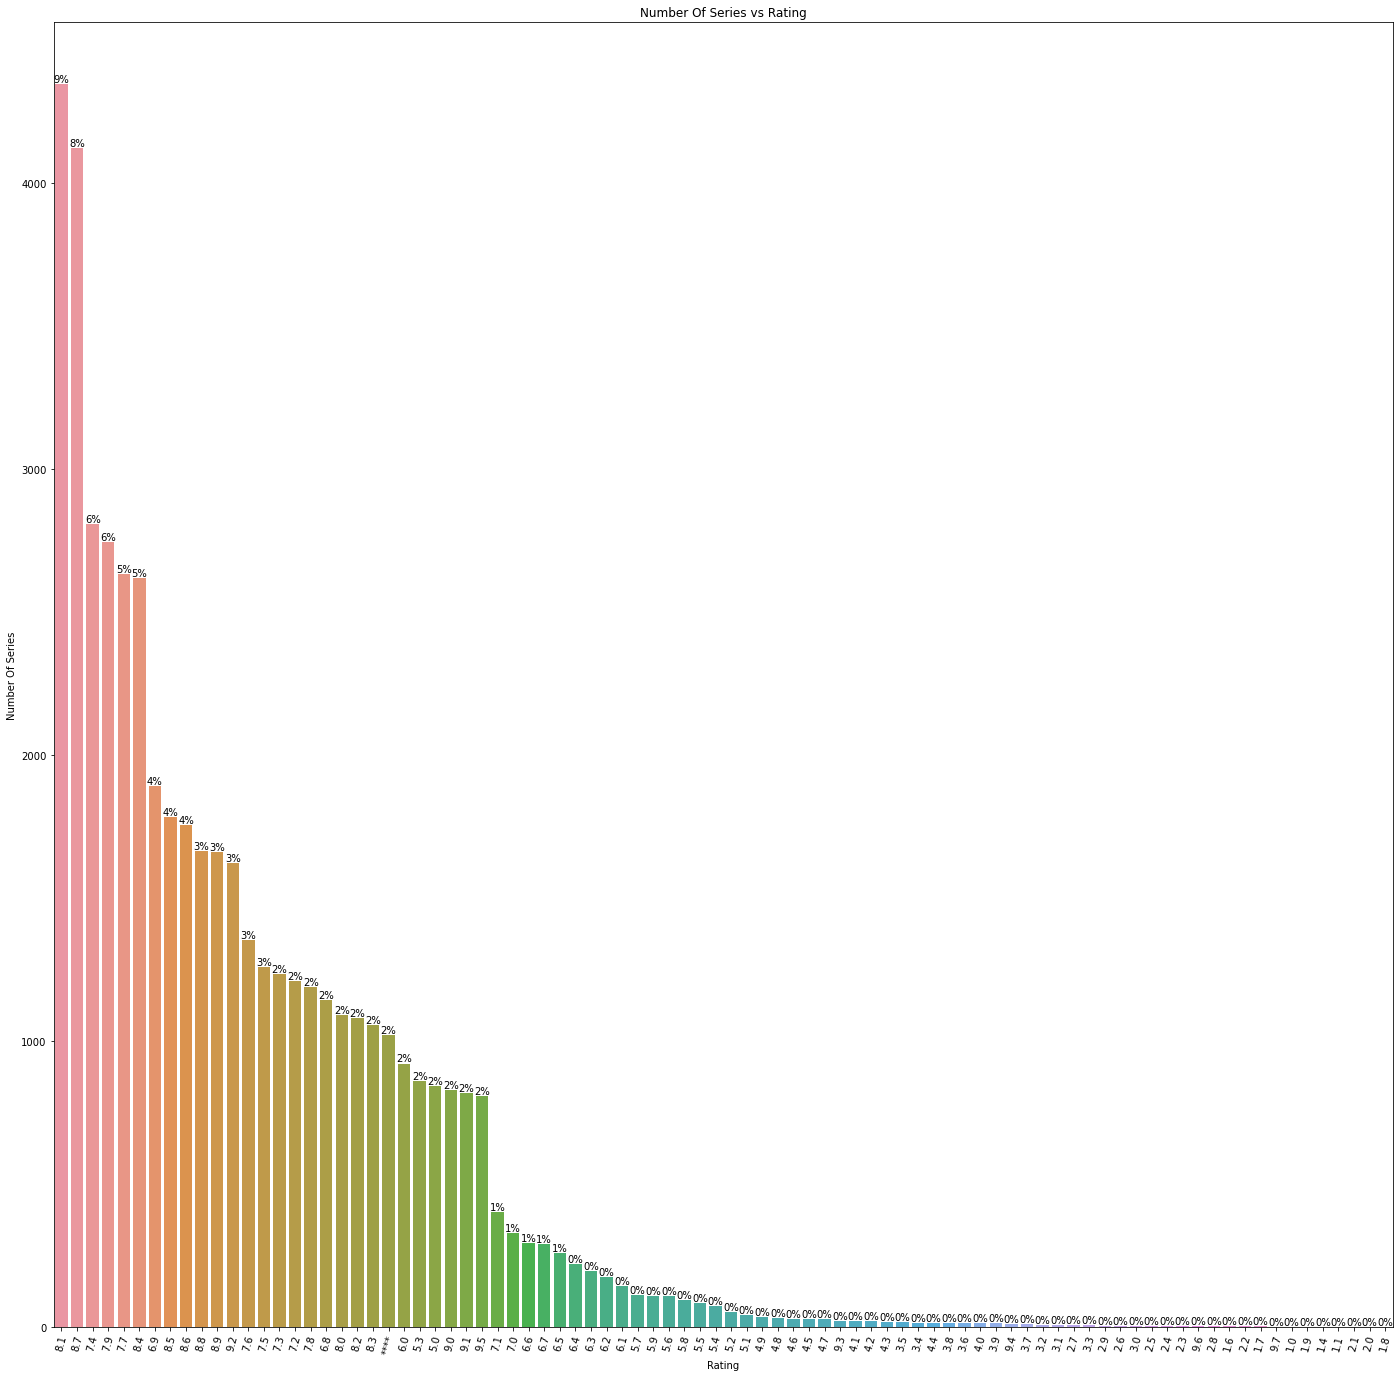

In [34]:
# Ploting these data using `barplot` to understand it better:
plt.figure(figsize=(24, 24))
graph=sns.barplot(y=top_rating, x=top_rating.index)

# set the x-axis tick labels to the desired percentages
for i in graph.containers:
     graph.bar_label(i, labels=['{:.0f}%'.format(x) for x in top_rating_per.values])
plt.title('Number Of Series vs Rating');
plt.xlabel('Rating');
plt.xticks(rotation=75)
plt.ylabel('Number Of Series')
plt.show()

## 9.3 Analyzing w.r.t. Cast:


In [35]:
# Viewing the dataset:
df2

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
3,1923,(2022–2023),60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...
4,Jack Ryan,(2018– ),60 min,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,...","Up-and-coming CIA analyst, Jack Ryan, is thrus..."
...,...,...,...,...,...,...,...
49995,Law & Order: Special Victims Unit,(1999– ),60 min,"Crime, Drama, Mystery",8.1,"Mariska Hargitay, Christopher Meloni, Ice-T, D...","This series follows the Special Victims Unit, ..."
49996,Doctor Who,(2005– ),45 min,"Adventure, Drama, Sci-Fi",8.6,"Jodie Whittaker, Peter Capaldi, Pearl Mackie, ...",The further adventures in time and space of th...
49997,The Lord of the Rings: The Rings of Power,(2022– ),****,"Action, Adventure, Drama",6.9,"Morfydd Clark, Ismael Cruz Cordova, Charlie Vi...",Epic drama set thousands of years before the e...
49998,The Bear,(2022– ),30 min,"Comedy, Drama",8.4,"Jeremy Allen White, Ebon Moss-Bachrach, Ayo Ed...",A young chef from the fine dining world return...


In [36]:
# Replacing an unidentified name with proper name:
df2.loc[df2['Cast'] == 'Joey Bada$$', 'Cast'] = 'Joey Bada'

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [37]:
# Calculating the appearence of `Joey Bada` in total series:
df2_filtered_cast = df2.loc[(df['Cast'] == 'Joey Bada')]
df2_filtered_cast.value_counts().sum()

0

In [38]:
# Number of series done by each casts
cast_df2=df2['Cast'].str.split(',').explode().value_counts().sort_values(ascending=False)
cast_df2

 Matt Smith        2403
 Olivia Colman      807
 Antony Starr       805
 Sophie Rundle      805
 Charlie Murphy     805
                   ... 
 Richard Cole         1
 Dani Romero          1
Mike Whiteside        1
 Robert Kulp          1
 Sean Pertwee         1
Name: Cast, Length: 29533, dtype: int64

In [39]:
# Top 100 casts:
top_100_cast=cast_df2.head(100)
top_100_cast

 Matt Smith        2403
 Olivia Colman      807
 Antony Starr       805
 Sophie Rundle      805
 Charlie Murphy     805
                   ... 
Henry Cavill        801
Lisette Olivera     801
 Luke Grimes        801
Kevin Costner       801
 Emma Myers         801
Name: Cast, Length: 100, dtype: int64

In [40]:
# Calculating the percentage of series done by each cast:
cast_df2_per=cast_df2/df2.shape[0]*100
cast_df2_per

 Matt Smith        4.830733
 Olivia Colman     1.622306
 Antony Starr      1.618286
 Sophie Rundle     1.618286
 Charlie Murphy    1.618286
                     ...   
 Richard Cole      0.002010
 Dani Romero       0.002010
Mike Whiteside     0.002010
 Robert Kulp       0.002010
 Sean Pertwee      0.002010
Name: Cast, Length: 29533, dtype: float64

In [41]:
# Top 100 casts percentage of series:
top_100_cast_per=cast_df2_per.head(100)
top_100_cast_per

 Matt Smith        4.830733
 Olivia Colman     1.622306
 Antony Starr      1.618286
 Sophie Rundle     1.618286
 Charlie Murphy    1.618286
                     ...   
Henry Cavill       1.610244
Lisette Olivera    1.610244
 Luke Grimes       1.610244
Kevin Costner      1.610244
 Emma Myers        1.610244
Name: Cast, Length: 100, dtype: float64

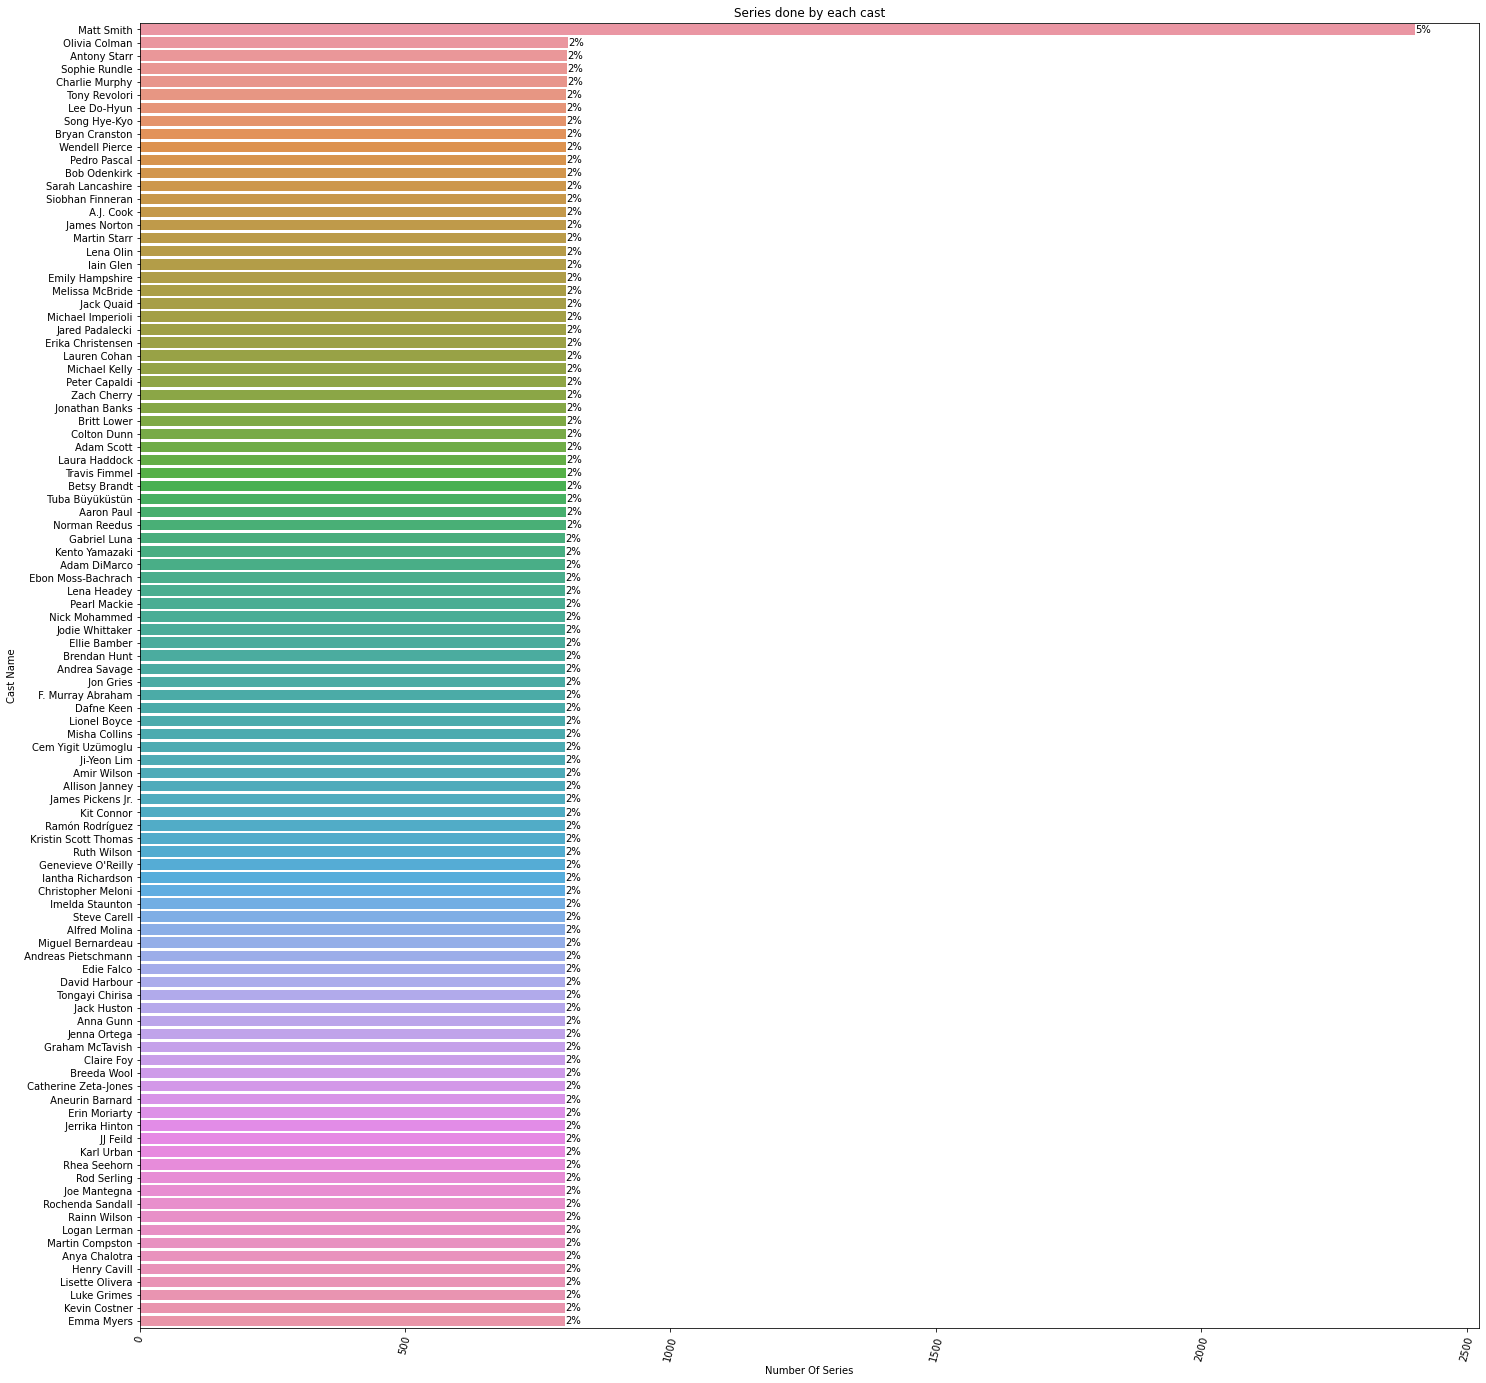

In [42]:
# Ploting these data using `barplot` to understand it better:
plt.figure(figsize=(24, 24))
graph=sns.barplot(y=top_100_cast.index, x=top_100_cast)

# set the x-axis tick labels to the desired percentages
for i in graph.containers:
     graph.bar_label(i, labels=['{:.0f}%'.format(x) for x in top_100_cast_per.values])
plt.title('Series done by each cast');
plt.ylabel('Cast Name');
plt.xticks(rotation=75)
plt.xlabel('Number Of Series')
plt.show()

## 9.4 Analyzing w.r.t. Series Title:


In [43]:
# Viewing the dataset:
df2.head(2)

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...


In [44]:
# Counting the occuring:
df2['Series Title'].value_counts()

The Office                              804
The Twilight Zone                       804
His Dark Materials                      802
Yellowstone                             802
Doctor Who                              802
                                       ... 
FBoy Island                               1
Mortal Kombat                             1
Guida astrologica per cuori infranti      1
Welcome to Earth                          1
MasterChef: The Professionals             1
Name: Series Title, Length: 9406, dtype: int64

In [45]:
#for genre in unique_values_genre:
def filter_by_series(df2, series):
    """
    Filters a DataFrame by genre
    
    Parameters:
        - df (DataFrame): The DataFrame to filter
        - series (str): The series to filter by
        
    Returns:
        - DataFrame: The filtered DataFrame
    """
    filtered_data = df2['Series Title'].loc[df['Series Title'].str.contains(series)]
    return filtered_data

In [46]:
# Checking working of the function:
filter_by_series(df2,'The Office').value_counts()

The Office                   804
The Office: Australia          1
The Office: The 3rd Floor      1
Name: Series Title, dtype: int64

In [47]:
df2_filtered = df2.loc[(df['Series Title'] == 'The Office')]
df2_filtered               

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
34,The Office,(2005–2013),22 min,Comedy,9.0,"Steve Carell, Jenna Fischer, John Krasinski, R...",A mockumentary on a group of typical office wo...
665,The Office,(2001–2003),30 min,"Comedy, Drama",8.5,"Ricky Gervais, Martin Freeman, Mackenzie Crook...",The story of an office that faces closure when...
5293,The Office,(2022–2023),****,Comedy,5.2,"Saleh Abuamrh, Fahad Albutairi, Nawaf Alshubai...","A Saudi remake of The Office, ""Al Maktab"" is a..."
6494,The Office,(2019– ),22 min,Comedy,5.7,"Gopal Datt, Sayandeep Sengupta, Samridhi Dewan...",The (mis)adventures of boss Jagdeep Chaddha an...
10034,The Office,(2005–2013),22 min,Comedy,9.0,"Steve Carell, Jenna Fischer, John Krasinski, R...",A mockumentary on a group of typical office wo...
...,...,...,...,...,...,...,...
49784,The Office,(2005–2013),22 min,Comedy,9.0,"Steve Carell, Jenna Fischer, John Krasinski, R...",A mockumentary on a group of typical office wo...
49834,The Office,(2005–2013),22 min,Comedy,9.0,"Steve Carell, Jenna Fischer, John Krasinski, R...",A mockumentary on a group of typical office wo...
49884,The Office,(2005–2013),22 min,Comedy,9.0,"Steve Carell, Jenna Fischer, John Krasinski, R...",A mockumentary on a group of typical office wo...
49934,The Office,(2005–2013),22 min,Comedy,9.0,"Steve Carell, Jenna Fischer, John Krasinski, R...",A mockumentary on a group of typical office wo...


## 9.5 Analyzing w.r.t. Release Year:

In [48]:
# Seeing the uninque values with occurence of `Release Year` Column:
df2['Release Year'].value_counts()

(2022– )       12925
(2023– )        3387
(2020– )        2726
(2005– )        2456
(2019– )        1891
               ...  
(1969–1997)        1
(1960–1963)        1
(1968–1969)        1
(1993–2016)        1
(1988)             1
Name: Release Year, Length: 1063, dtype: int64

In [49]:
# Clean the `Release Year` column into proper year:
df2['Release Year'] = df2['Release Year'].str.extract(r'(\d{4})', expand=False);
df2

/tmp/ipykernel_668/853030390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Release Year'] = df2['Release Year'].str.extract(r'(\d{4})', expand=False);


,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,2022,45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,2018,60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,2021,60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
3,1923,2022,60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...
4,Jack Ryan,2018,60 min,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,...","Up-and-coming CIA analyst, Jack Ryan, is thrus..."
...,...,...,...,...,...,...,...
49995,Law & Order: Special Victims Unit,1999,60 min,"Crime, Drama, Mystery",8.1,"Mariska Hargitay, Christopher Meloni, Ice-T, D...","This series follows the Special Victims Unit, ..."
49996,Doctor Who,2005,45 min,"Adventure, Drama, Sci-Fi",8.6,"Jodie Whittaker, Peter Capaldi, Pearl Mackie, ...",The further adventures in time and space of th...
49997,The Lord of the Rings: The Rings of Power,2022,****,"Action, Adventure, Drama",6.9,"Morfydd Clark, Ismael Cruz Cordova, Charlie Vi...",Epic drama set thousands of years before the e...
49998,The Bear,2022,30 min,"Comedy, Drama",8.4,"Jeremy Allen White, Ebon Moss-Bachrach, Ayo Ed...",A young chef from the fine dining world return...


In [50]:
# Now Counting the  unique values of `Release Year` column with occurence:
yearwise_series=df2['Release Year'].value_counts()
yearwise_series

2022    14742
2020     4653
2005     4142
2023     3392
2019     3023
        ...  
1940        2
1948        2
1930        1
1947        1
2024        1
Name: Release Year, Length: 80, dtype: int64

In [51]:
# Calculating the percentage of series produced yearwise:
yearwise_series_per= yearwise_series/df2.shape[0]*100
yearwise_series_per

2022    29.635735
2020     9.353892
2005     8.326632
2023     6.818913
2019     6.077115
          ...    
1940     0.004021
1948     0.004021
1930     0.002010
1947     0.002010
2024     0.002010
Name: Release Year, Length: 80, dtype: float64

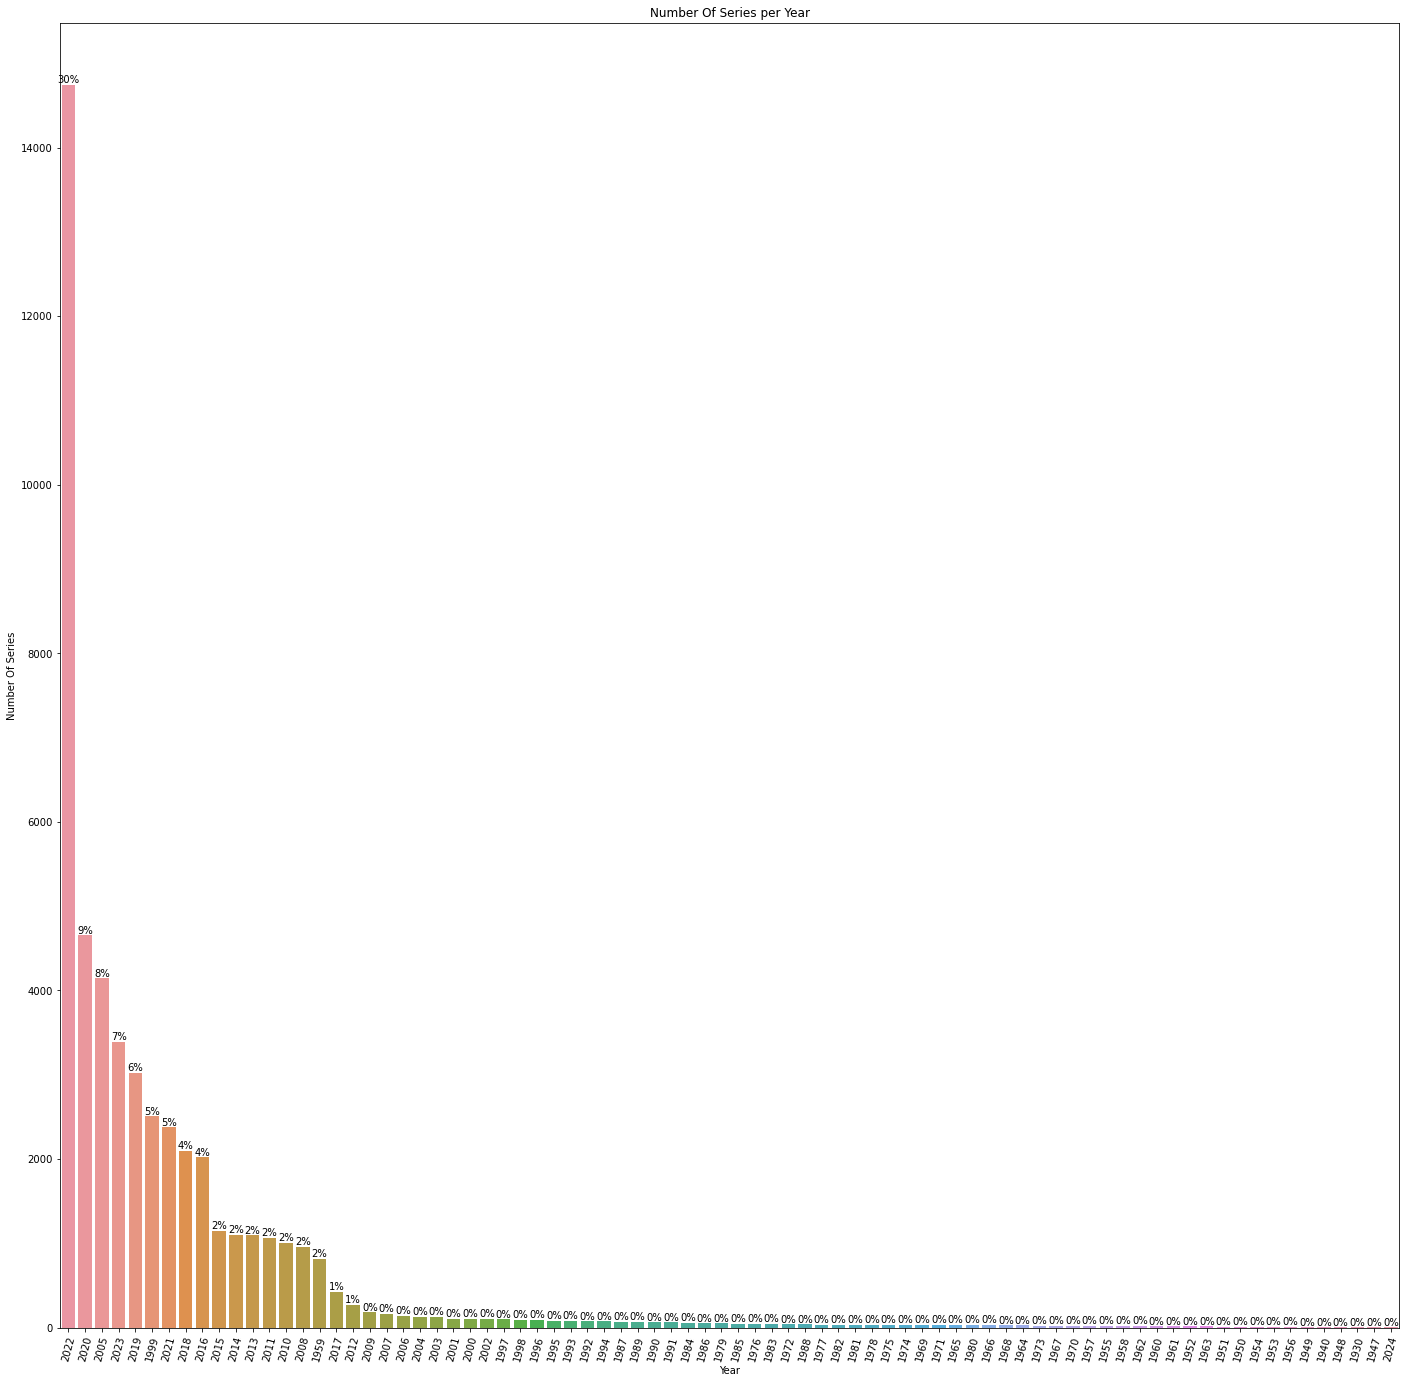

In [52]:
# Ploting these data using `barplot` to understand it better:
plt.figure(figsize=(24, 24))
graph=sns.barplot(y=yearwise_series, x=yearwise_series.index)

# set the x-axis tick labels to the desired percentages
for i in graph.containers:
     graph.bar_label(i, labels=['{:.0f}%'.format(x) for x in yearwise_series_per.values])
plt.title('Number Of Series per Year');
plt.xlabel('Year');
plt.xticks(rotation=75)
plt.ylabel('Number Of Series')
plt.show()

## 9.6 analyzing w.r.t. Runtime:

In [53]:
# Viewing the dataset
df2.head(3)

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,2022,45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,2018,60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,2021,60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."


In [54]:
# Changing the `Runtime` column into numbers (in Minutes):
df2['Runtime'] = df2['Runtime'].str.replace('min','')

df2.head(5)

/tmp/ipykernel_668/10518460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Runtime'] = df2['Runtime'].str.replace('min','')


,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,2022,45,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,2018,60,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,2021,60,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
3,1923,2022,60,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...
4,Jack Ryan,2018,60,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,...","Up-and-coming CIA analyst, Jack Ryan, is thrus..."


In [55]:
df2['Runtime'].max()

'99 '

#### Note: Runtime is in `Minutes`.

In [56]:
# Seeing the unique values with occurence in `Runtime` column:
df2['Runtime'].value_counts()

60      10458
****     8712
30       4140
44       3406
50       2689
        ...  
79          1
276         1
185         1
289         1
101         1
Name: Runtime, Length: 236, dtype: int64

In [57]:
# Convert non-numeric values to NaN
df2['Runtime'] = pd.to_numeric(df2['Runtime'], errors='coerce')

# Replace NaN values with the mean of the remaining non-NaN values
df2['Runtime'].fillna(df2['Runtime'].mean(), inplace=True)

df2_mean_runtime=df2['Runtime'].mean()
df2_mean_runtime


/tmp/ipykernel_668/2738625309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Runtime'] = pd.to_numeric(df2['Runtime'], errors='coerce')
/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


49.57536984231897

#### Note: The Avearage watch time (Runtime) of these series = `49.58 min` 

## Boxplot w.r.t. Runtime:

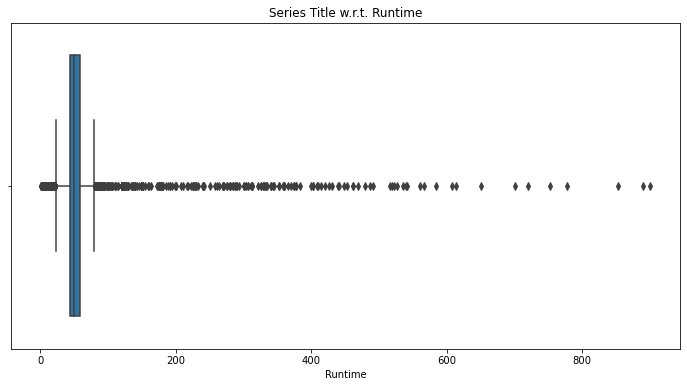

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df2, x='Runtime')
plt.title('Series Title w.r.t. Runtime');
plt.show()

## Barplot w.r.t. Runtime:

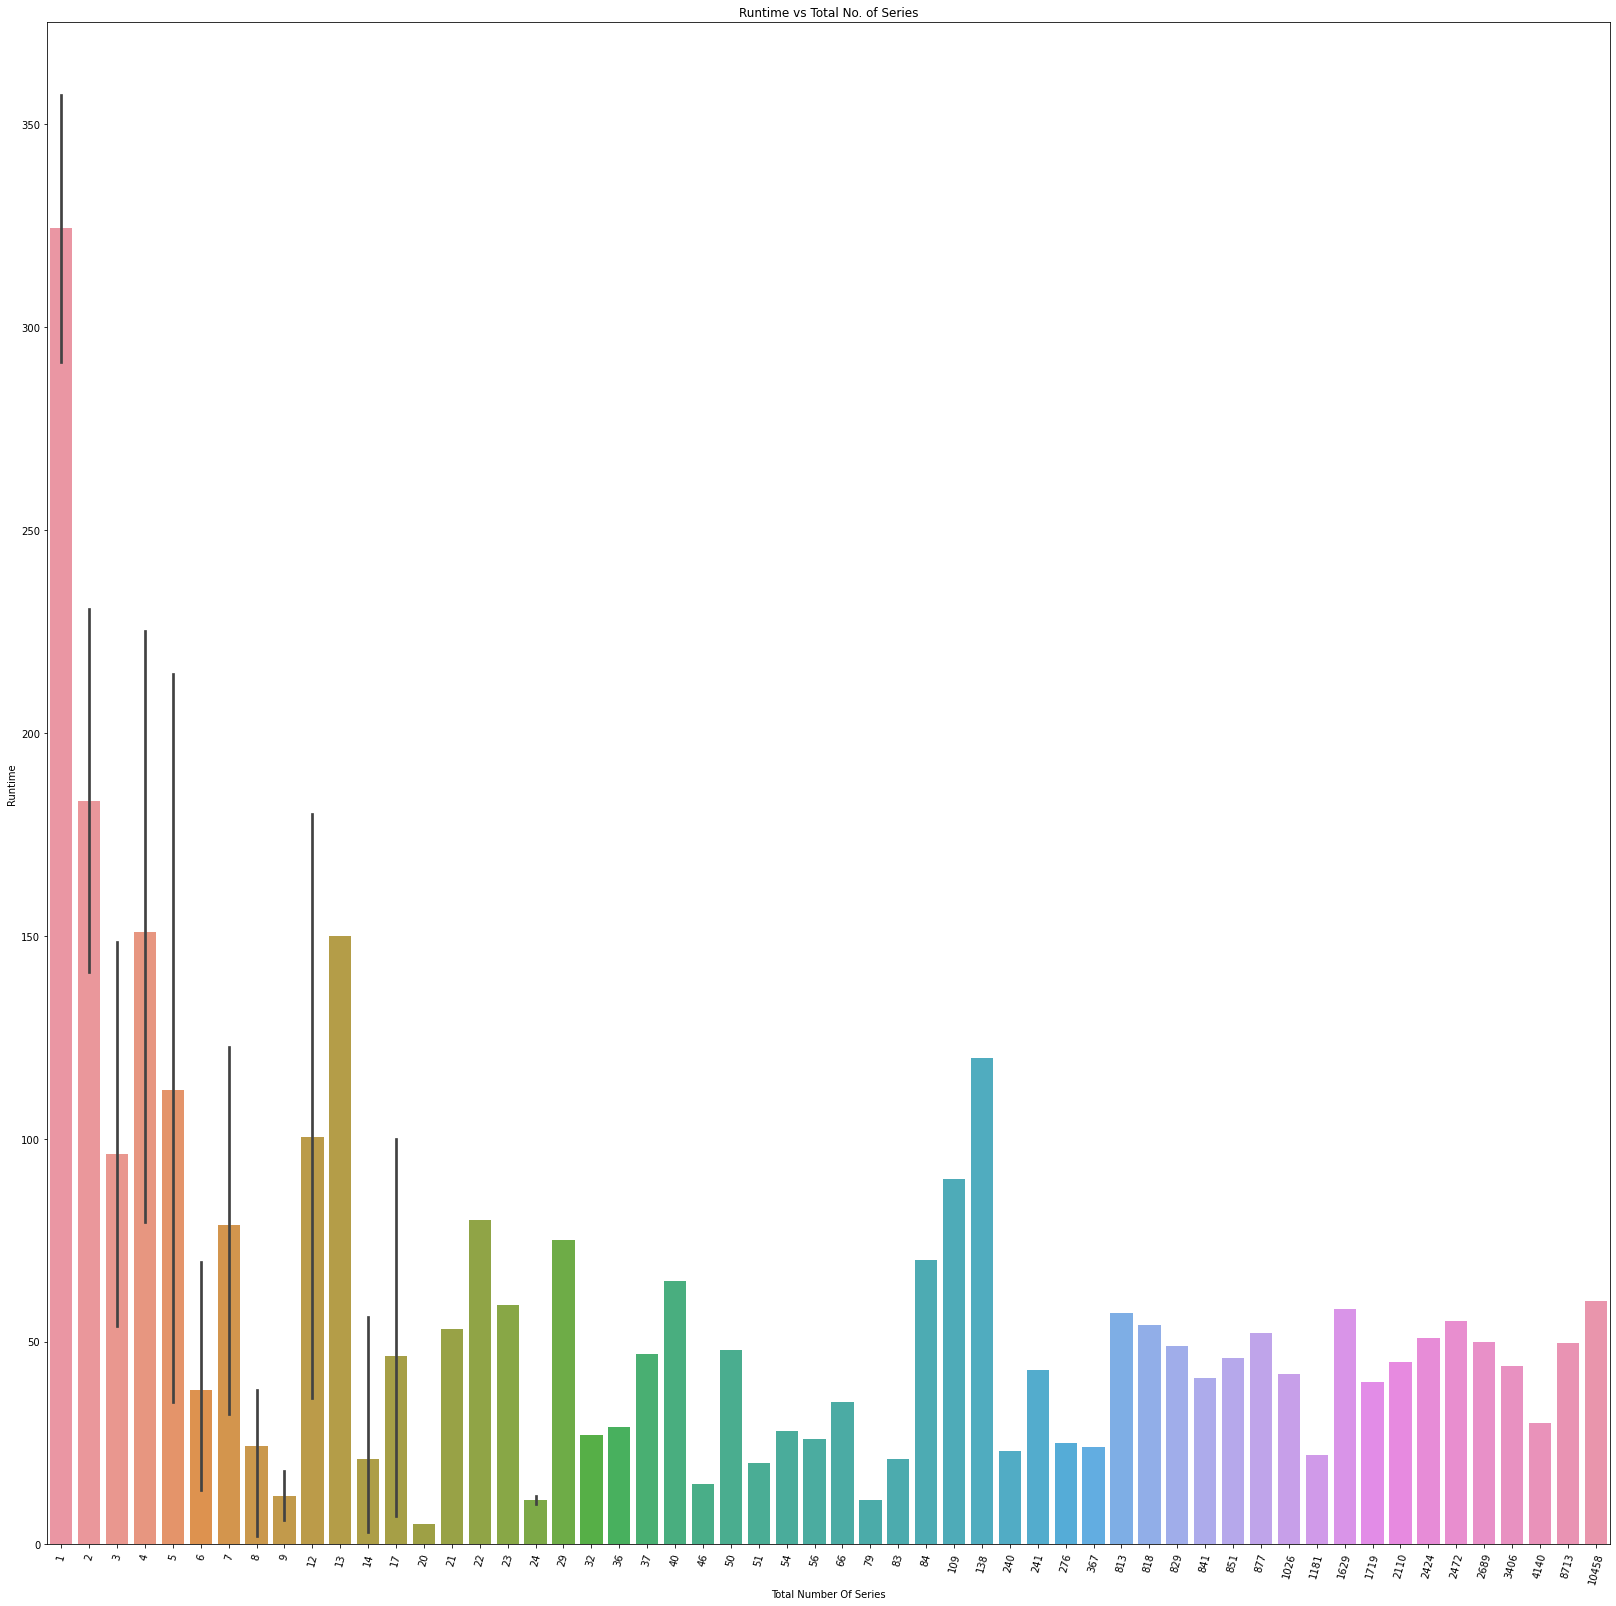

In [59]:
# Let's see the `Runtime` column:
runtime_df2=df2['Runtime'].value_counts().sort_values(ascending=False)

# Ploting these data using `barplot` to understand it better:
plt.figure(figsize=(28, 28))
graph=sns.barplot(x=runtime_df2, y=runtime_df2.index)

plt.title('Runtime vs Total No. of Series');
plt.ylabel('Runtime');
plt.xticks(rotation=75)
plt.xlabel('Total Number Of Series')
plt.show()

# Let's Ask some interesting question:

## Question 1:
What is the maximum Runtime?

## Answer:
To answer this question firstly we see the `Runtime` column with value_counts and then plot a histogram to visualize the occurrence with the rating. So, let's see,

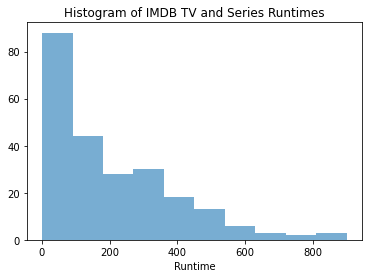

The maximum runtime is: 900.0 minutes or 15.0 Hrs.


In [60]:
# Plot the histogram of the 'Runtime' column
plt.hist(x=df2['Runtime'].value_counts().index,bins=10,alpha=.6)
plt.xlabel('Runtime')
plt.title('Histogram of IMDB TV and Series Runtimes')
plt.show()

# Find the maximum runtime
max_runtime = df2['Runtime'].max()
print("The maximum runtime is:", max_runtime, "minutes or",max_runtime/60,"Hrs.")

## Note:
* Form the histogram and the calculation shows that the maximum runtime = `900 min` or `15 Hrs`.

## Question 2: 
Which actor has done maximum no. of the series?

## Answer:
Well this one is little bit tricky because we can see the `Cast` column isn't clean. So first we separate all the Casts in single form and then count the occurrence in the Cast column it means we are counting the presence of a cast in the entire Cast dataset.After that we plot a Bar chart to see how many series done by that cast.

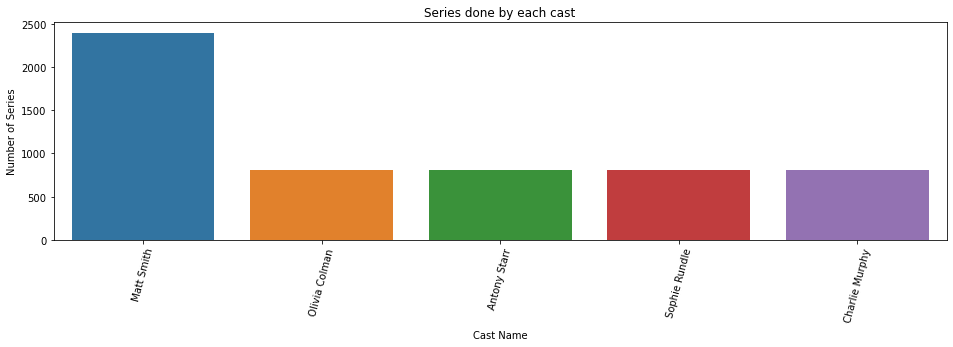

 Matt Smith    2403
Name: Cast, dtype: int64

In [61]:
top_cast_df2=df2['Cast'].str.split(',').explode().value_counts().sort_values(ascending=False)

# Ploting these data using `barplot` to understand it better:
plt.figure(figsize=(16, 4))
sns.barplot(x=top_cast_df2.head(5).index, y=top_cast_df2.head(5))

plt.title('Series done by each cast');
plt.ylabel('Number of Series');
plt.xticks(rotation=75)
plt.xlabel('Cast Name')
plt.show()

# Find the actor with maximum no. of series
top_cast_df2.head(1)

## Note:
*  With the help of the bar plot and the calculation we can clearly see that `Matt Smith` appeared the most in total `2403` series.

## Question 3:
In which year maximum number of series have produced?

## Answer:
Release Year column is pretty much cleaned so we just `value_counts()` and arrange it into descending form so that we could select the top 5 years with maximum number of series. After that we plot a Horizontal bar plot to visualize the same.

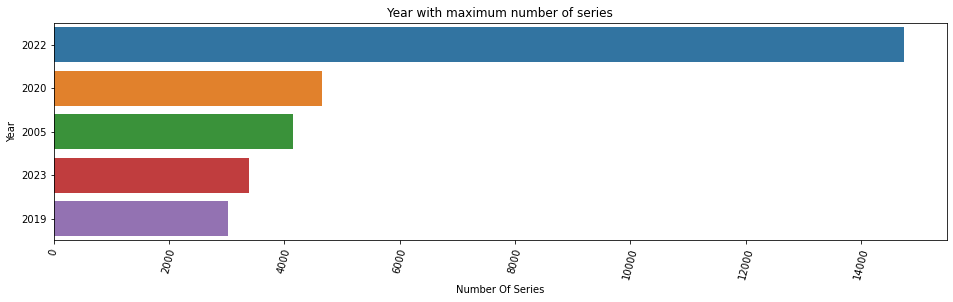

2022    14742
Name: Release Year, dtype: int64

In [62]:
top_year_df2=df2['Release Year'].value_counts().sort_values(ascending=False)

# Ploting these data using `barplot` to understand it better:
plt.figure(figsize=(16, 4))
sns.barplot(y=top_year_df2.head(5).index, x=top_year_df2.head(5))

plt.title('Year with maximum number of series');
plt.ylabel('Year');
plt.xticks(rotation=75)
plt.xlabel('Number Of Series')
plt.show()

# Find the actor with maximum no. of series
top_year_df2.head(1)

## Note:
* In the bar plot we can see the year and to be very precise I have calculated the maximum number of series has produced in `2022` i.e., `14742`.

## Question 5:
Which series have maximum no. of seasions?

## Answer:
This one is very similar to Release Year column. For this we just need to value_counts() for the `Series Title` and sort it to descending form and we just need to take top 5 series names so that we can visualize it properly. We are using a pie plot which is very popular for this type of situations.

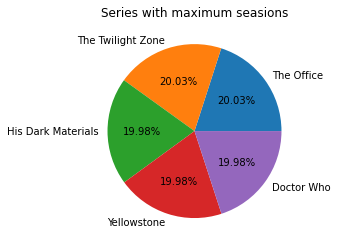

The Office            804
The Twilight Zone     804
His Dark Materials    802
Yellowstone           802
Doctor Who            802
Name: Series Title, dtype: int64

In [79]:
top_series_df2=df2['Series Title'].value_counts().sort_values(ascending=False).head(5)

# Ploting these data using `barplot` to understand it better:
plt.figure(figsize=(16, 4))
plt.pie(top_series_df2,labels=top_series_df2.index, autopct='%.2f%%')
plt.title('Series with maximum seasions');
plt.show()

# Find the actor with maximum no. of series
top_series_df2.head(5)

## Note:
* There are two Series `The Office` and `The Twilight Zone` which appear the most total `804` times.

## Question 6:
What is total number of Genres and name?

## Answer:
Again this one is tricky a bit let's clean the `Genre` column in separate Genre and then count the number of series within different genre. We are using a bar plot for entire genre to visualize it clearly. Let's see,

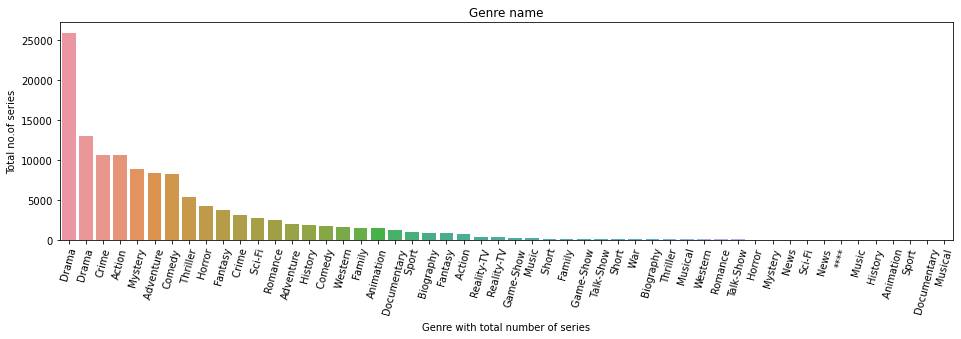

52

In [66]:
genre=df2['Genre'].str.split(',').explode().value_counts().sort_values(ascending=False)

# Ploting these data using `barplot` to understand it better:
plt.figure(figsize=(16, 4))
sns.barplot(x=genre.index, y=genre)

plt.title('Genre name');
plt.ylabel('Total no.of series');
plt.xticks(rotation=75)
plt.xlabel('Genre with total number of series')
plt.show()

# total no. genre
len(genre)

## Note:
* This is clear with the calculation that the total number of Genre = `52`. Also we can see in the bar plot.

## Question 7: 
Which genre have the most series, list top 5 genre name with number of series?

## Answer:
We will use the same code as the above one and separate the `head(5)` and visualize it with the help of Pie plot to understand it batter. 

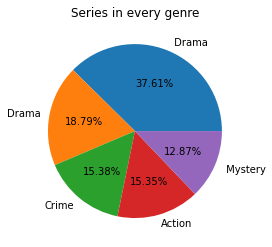

 Drama    25876
Name: Genre, dtype: int64

In [67]:
top_genre=df2['Genre'].str.split(',').explode().value_counts().sort_values(ascending= False).head(5)

# Ploting these data using `barplot` to understand it better:
plt.figure(figsize=(16, 4))
plt.pie(top_genre,labels=top_genre.index, autopct='%.2f%%')

plt.title('Series in every genre');
plt.show()

# total no. genre
top_genre.head(1)

## Note:
* We can see the `Drama` genre has the most number of series i.e., `37.61%` or `25876` and the genre wise top 5 series are shown with their percentage on the above Pie chart.

## Question 8:
What is the maximum rating and how many series have that rating?

## Answer:
Yes this is interesting we are going to use `groupby()` to count the number of series with the respective ratings. Since we need the maximum rating give to  the series with the number of series. It is clear we need to sort and then we visualize with a colorful bar plot.

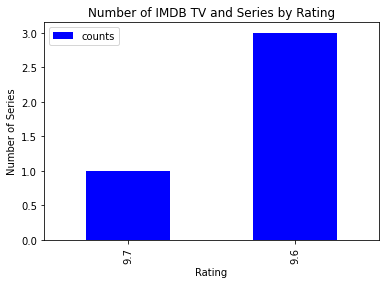

The Maximum rating given is    Rating  counts
85    9.7       1


In [68]:
# Group the data by the 'Rating' column and count the number of series for each rating
rating_counts = df2.groupby('Rating')['Series Title'].count().reset_index(name='counts')

# Sort the data frame in descending order based on the rating values
rating_counts = rating_counts.sort_values(by='Rating', ascending=False).head(2)

# Plot the data using a bar plot
rating_counts.plot.bar(x='Rating', y='counts', color='b')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Series')
plt.title('Number of IMDB TV and Series by Rating')
plt.show()

# Printing the maximum rating
print('The Maximum rating given is',rating_counts.head(1))

In [69]:
# Let's locate the entire row:
df2.loc[(df2['Rating'] == '9.7')]

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
2790,His Dark Materials,2003,49.57537,"Adventure, Drama, Fantasy",9.7,"Terence Stamp, Kenneth Cranham, Bill Paterson,...",A young girl sets out on a quest that takes he...


## Note:
* The maximum rating is `9.7` and only `1` i.e., `His Dark Materials`.

## Question 9:
Which ratings is given to the maximum number of series, list top 5?

## Answer:
To find the most frequent rating we just need to value count and short it. After that we take head(5) elements to visualize it in a pie chat so that we can understand.

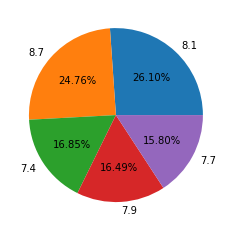

8.1    4346
8.7    4123
7.4    2807
7.9    2746
7.7    2632
Name: Rating, dtype: int64


In [70]:
top_5_rating=df['Rating'].value_counts().sort_values(ascending=False).head(5)
plt.pie(top_5_rating,labels=top_5_rating.index, autopct='%.2f%%')
plt.show()

#showing these ratings
print(top_5_rating)

## Note:
* The rating  `8.1` is given to the `26.10%` or `4346` series which is the highest and top 5 most rated series are listed above.

## Question 10:
Write a function to filter the *Series Title* when we entre the *rating*.

## Answer:
We have done a similar concept in above during cleaning the data set it is very useful to define a function.
* First we need to write a proper name with appropriate variables. 
* Here we need only one i.e., Rating because our dataset is defined to it just fix (we can change it also).
* Now in this function we use `loc` method to filter the `series titles`.
* Then we return these names.
Let's see,

In [71]:
def filter_by_rating(df2, rating):
    """
    Filters a DataFrame by genre
    
    Parameters:
        - df (DataFrame): The DataFrame to filter
        - rating (str): The rating to filter by
        
    Returns:
        - DataFrame: The filtered DataFrame
    """
    filtered_data = df2['Series Title'].loc[df['Rating'].str.contains(rating)]
    return filtered_data

## Let's check it:

In [72]:
filter_by_rating(df2, '8.4')

17                     Andor
48                  The Bear
49              Supernatural
66       The Handmaid's Tale
69                  Euphoria
                ...         
49948               The Bear
49949           Supernatural
49967                  Andor
49998               The Bear
49999           Supernatural
Name: Series Title, Length: 2620, dtype: object

* Yes, its working properly!

# Conclusion:

* It is very intresting dataset to explore. 
* I have just screatched a litle bit there is more to explore.


# Application:

* We can use this data to build a `Recommandation System` for the TV & Series lovers.
* We can find the previous trends to and help Series makers.
* It is very helpful to predict the most active Actor and Series.

```
Thanking You!
```

# Let's Save our work using `Jovian`:

In [73]:
# Install jovian
!pip install jovian

In [74]:
#Import Jovian
import jovian

In [80]:
# Commiting the jovian
jovian.commit(project='50,000 IMDV TV & WEB SERIES')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sonihariom555/50000-imdv-tv-web-series" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/sonihariom555/50000-imdv-tv-web-series


'https://jovian.com/sonihariom555/50000-imdv-tv-web-series'